<a href="https://colab.research.google.com/github/hache22/Redes-Convolucionales/blob/main/Red_Neuronal_Convolucional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este es un Script realizado en python , el cual trata de una red neuronal convolucional para prediccion de imagenes(las cuales contienen numeros escritos a mano)
La misma utiliza un set de datos llamado "MNIST" que es un set de tensorflow el cual posee una gran cantidad de imagenes de numeros escritos a mano por personas.
Esta red posee una eficacia del 99% en sus predicciones, la misma taza de aprendizaje se puede observar dentro del parametro "accuracy" en el la fase de entrenamiento del modelo.


In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
datos, metadatos = tfds.load("mnist", as_supervised=True, with_info=True)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
metadatos

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='/root/tensorflow_datasets/mnist/3.0.1.incomplete3DXB0U',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",

In [4]:
datos_entrenamiento = datos["train"]
datos_pruebas = datos["test"]

In [5]:
nombres_clases = metadatos.features["label"].names

In [6]:
#Normalizacion
#0-255 1 byte
#Transformar 0-255 0-1 (0=0, 255=1, 127=.5)

#Normalizar datos ent y pruebas con una funcion
def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes = imagenes/255
  return imagenes, etiquetas

datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

#Agregar en cache
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()

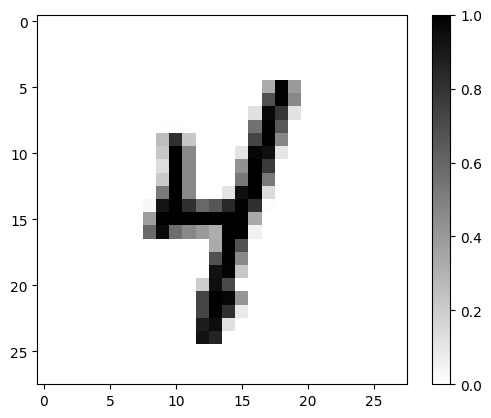

In [7]:
for imagen, etiqueta in datos_entrenamiento.take(1):
  break

import matplotlib.pyplot as plt

#Mostrarlo en pantalla
plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.show()

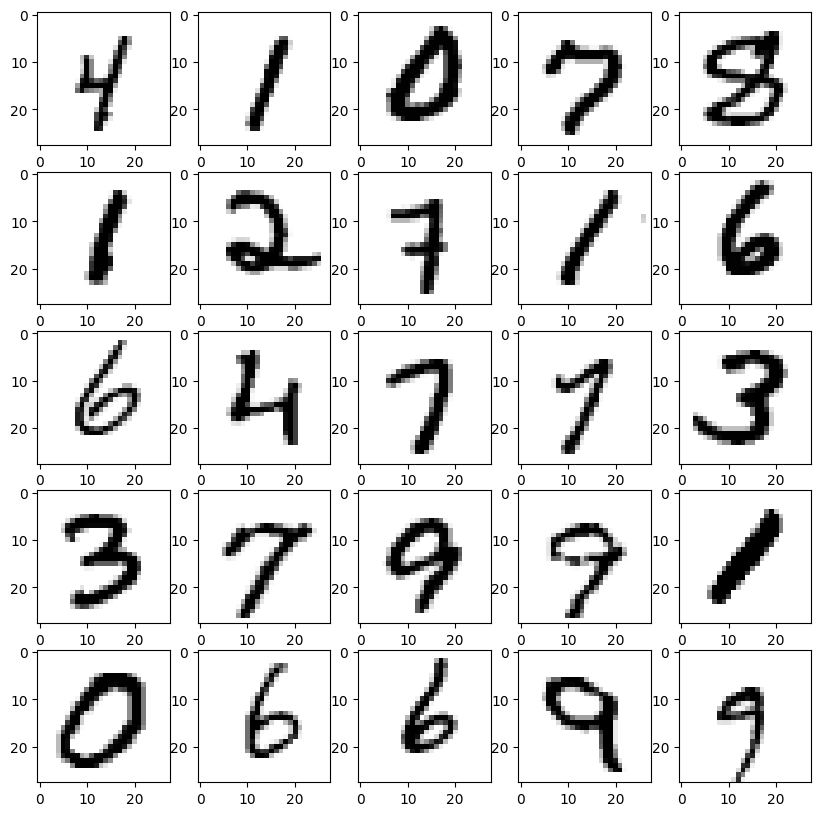

In [8]:
plt.figure(figsize=(10,10))
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
  #Mostrarlo en pantalla
  plt.subplot(5, 5, i+1)
  plt.imshow(imagen, cmap=plt.cm.binary)

plt.show()

In [9]:
"""modelo = tf.keras.Sequential([
    #784 datos de entrada
    tf.keras.layers.Flatten(input_shape=(28,28,1)), #1 = blanco y negro
    # # # Capa oculta
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    # Capa de salida
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])"""

modelo = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(28,28,1), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [10]:
modelo.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [11]:
TAMANO_LOTE = 32

datos_entrenamiento = datos_entrenamiento.repeat().shuffle(60000).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

In [12]:
import math

#Entrenar
entrnamiento = modelo.fit(
    datos_entrenamiento, epochs=10,
    steps_per_epoch=math.ceil(60000/TAMANO_LOTE)
)

Epoch 1/10
1875/1875 [==============================] - 20s 6ms/step - loss: 0.1324 - accuracy: 0.9593
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0452 - accuracy: 0.9865
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0299 - accuracy: 0.9904
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0229 - accuracy: 0.9926
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0165 - accuracy: 0.9944
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0137 - accuracy: 0.9956
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0103 - accuracy: 0.9965
Epoch 8/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0081 - accuracy: 0.9975
Epoch 9/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0085 - accuracy: 0.9972
Epoch 10/10
1875/1875 [==============================] - 16s 9ms/step

1/1 [==============================] - 0s 242ms/step


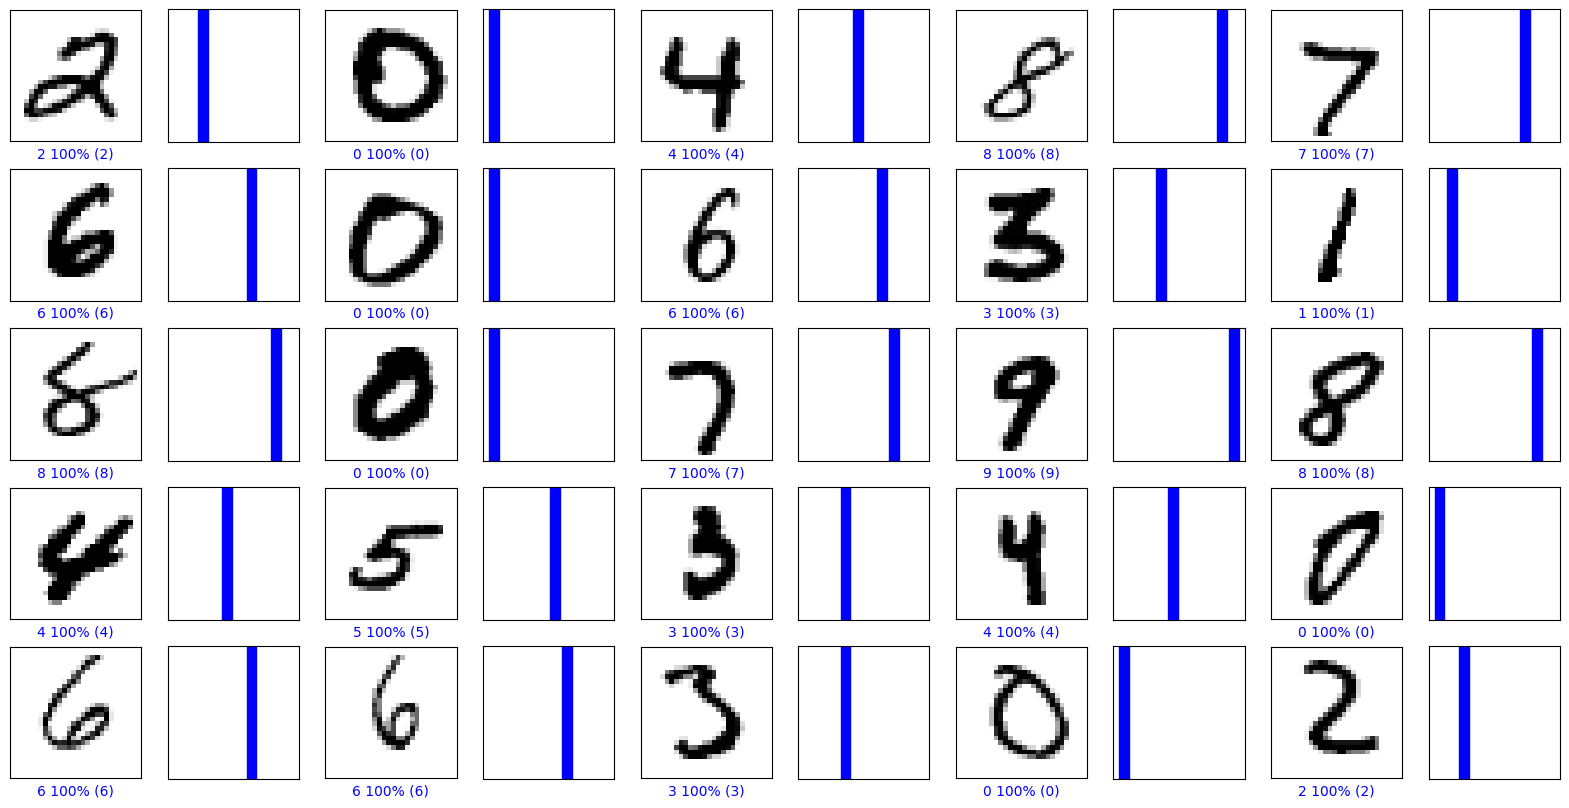

In [13]:
#Pintar una cuadricula con varias predicciones, y marcar si fue correcta (azul) o incorrecta (roja)
import numpy as np

for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)

def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
  arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  etiqueta_prediccion = np.argmax(arr_predicciones)
  if etiqueta_prediccion == etiqueta_real:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(nombres_clases[etiqueta_prediccion],
                                100*np.max(arr_predicciones),
                                nombres_clases[etiqueta_real]),
                                color=color)

def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
  arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  grafica = plt.bar(range(10), arr_predicciones, color="#777777")
  plt.ylim([0, 1])
  etiqueta_prediccion = np.argmax(arr_predicciones)

  grafica[etiqueta_prediccion].set_color('red')
  grafica[etiqueta_real].set_color('blue')

filas = 5
columnas = 5
num_imagenes = filas*columnas
plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imagenes):
  plt.subplot(filas, 2*columnas, 2*i+1)
  graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(filas, 2*columnas, 2*i+2)
  graficar_valor_arreglo(i, predicciones, etiquetas_prueba)

Esta Fraccion del codigo hace referencia a otro modelo entrenado para diferenciar Perros de gatos.
Esta parte corresponde a otra red convolucional entrenada por separado la cual utiliza un set de datos de TENSORFLOW llamado "cats_vs_dogs" , tambien con una taza de rendimiento cercana al 99%.

In [14]:
datos, metadatos = tfds.load("cats_vs_dogs", as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.1.incomplete7AQ5SV/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [ ]:
metadatos

# Separacion de los datos en entrenamiento

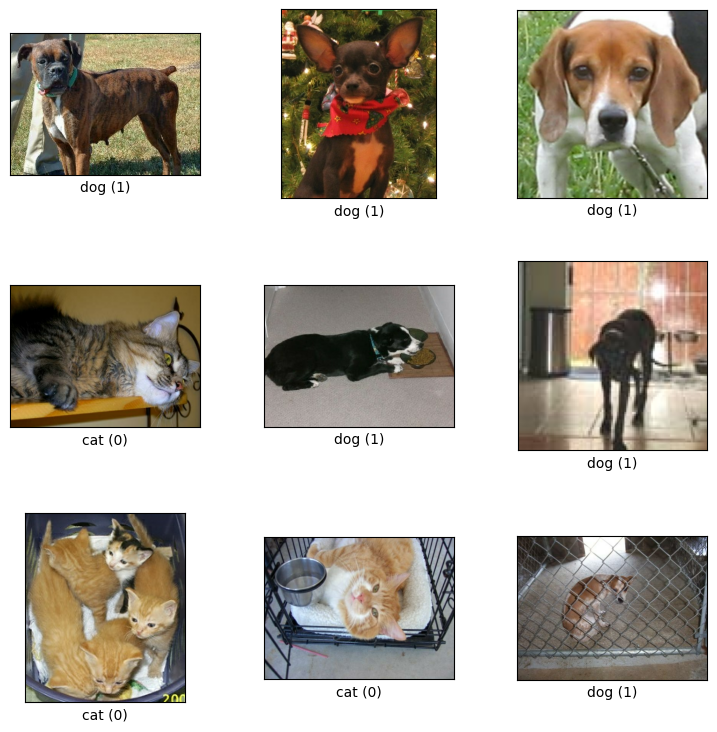

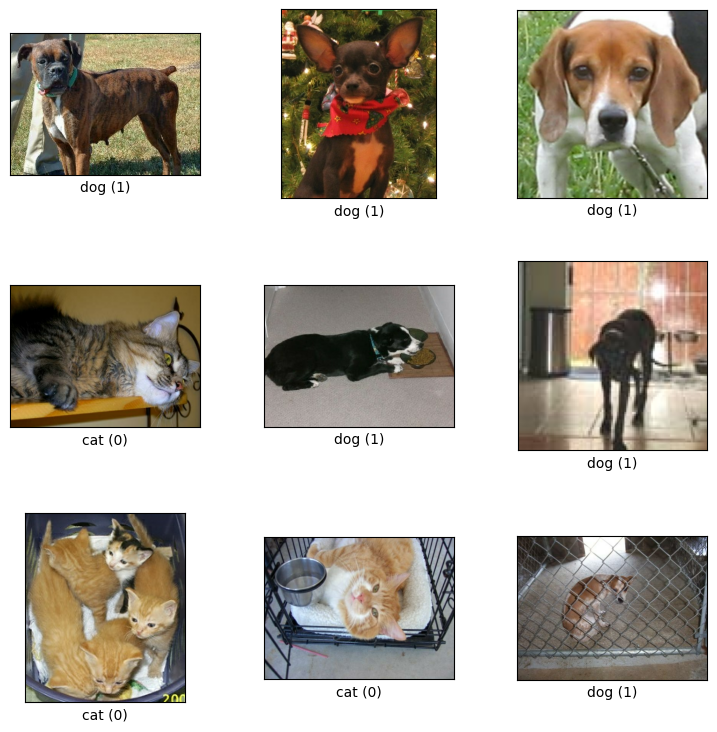

In [16]:
tfds.show_examples(datos["train"], metadatos)

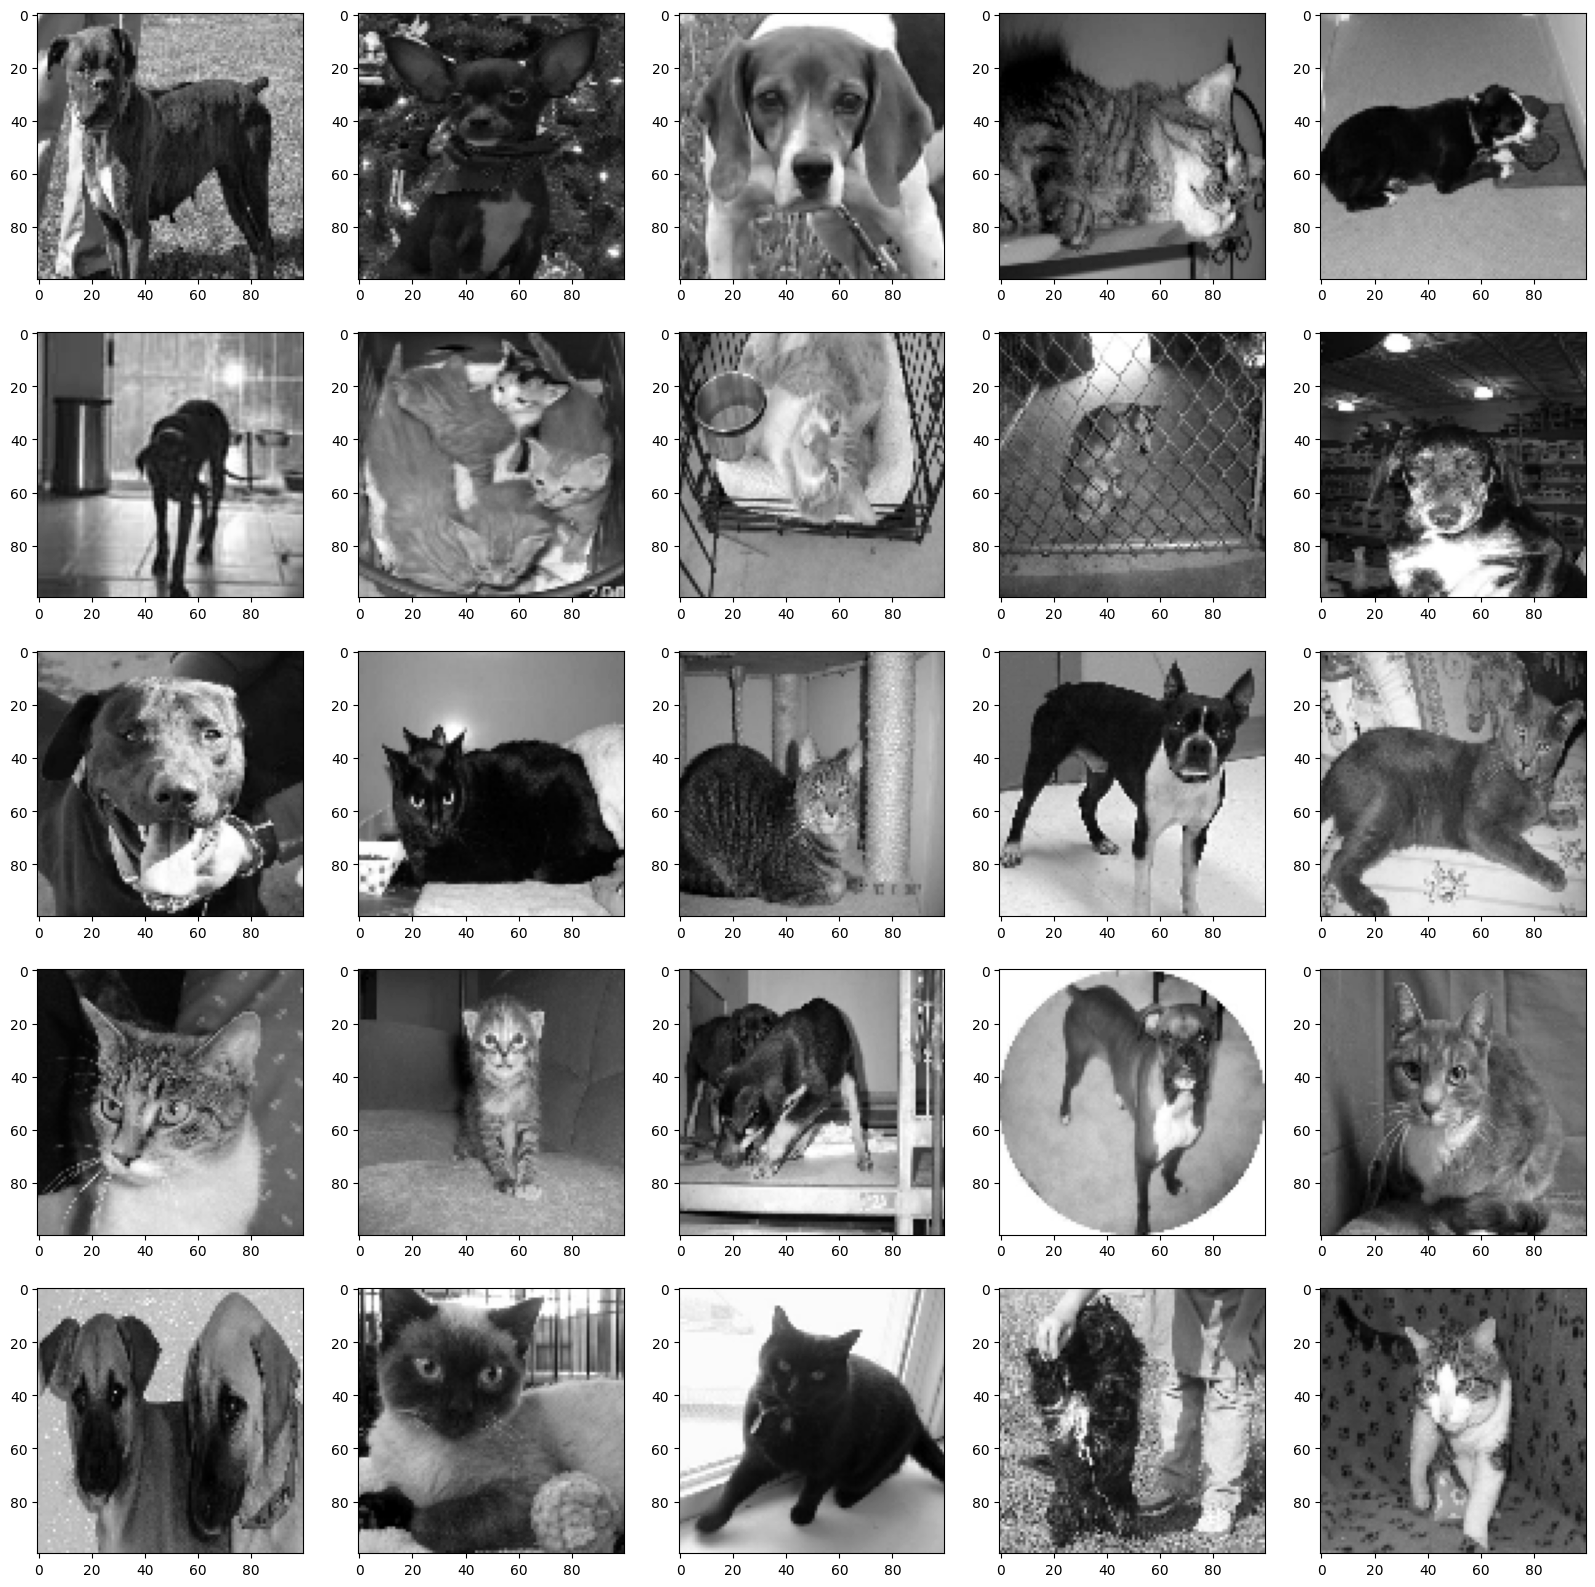

In [17]:
import matplotlib.pyplot as plt
import cv2 #opencv - trabajar y hacer trnasformaciones en imagenes

plt.figure(figsize=(20,20))

TAMANO_IMG=100

for i, (imagen, etiqueta) in enumerate(datos["train"].take(25)):
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  plt.subplot(5, 5, i+1)
  plt.imshow(imagen, cmap="gray")

In [18]:
datos_entrenamiento = []

In [19]:
for i, (imagen, etiqueta) in enumerate(datos["train"]):
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  imagen = imagen.reshape(TAMANO_IMG, TAMANO_IMG, 1)
  datos_entrenamiento.append([imagen, etiqueta])

In [20]:
datos_entrenamiento[0]

[array([[[249],
         [190],
         [105],
         ...,
         [189],
         [196],
         [143]],
 
        [[232],
         [127],
         [ 88],
         ...,
         [187],
         [180],
         [186]],
 
        [[171],
         [ 87],
         [ 83],
         ...,
         [129],
         [158],
         [166]],
 
        ...,
 
        [[113],
         [173],
         [162],
         ...,
         [143],
         [156],
         [119]],
 
        [[140],
         [152],
         [171],
         ...,
         [ 98],
         [155],
         [154]],
 
        [[ 91],
         [109],
         [167],
         ...,
         [ 46],
         [ 51],
         [ 47]]], dtype=uint8),
 <tf.Tensor: shape=(), dtype=int64, numpy=1>]

In [21]:
#Preparar variablas X y y

X = []
y = []

for imagen, etiqueta in datos_entrenamiento:
  X.append(imagen)
  y.append(etiqueta)

In [22]:
#Normalizar las imagenes
import numpy as np

X = np.array(X).astype(float) / 255

In [23]:
X[0]

array([[[0.97647059],
        [0.74509804],
        [0.41176471],
        ...,
        [0.74117647],
        [0.76862745],
        [0.56078431]],

       [[0.90980392],
        [0.49803922],
        [0.34509804],
        ...,
        [0.73333333],
        [0.70588235],
        [0.72941176]],

       [[0.67058824],
        [0.34117647],
        [0.3254902 ],
        ...,
        [0.50588235],
        [0.61960784],
        [0.65098039]],

       ...,

       [[0.44313725],
        [0.67843137],
        [0.63529412],
        ...,
        [0.56078431],
        [0.61176471],
        [0.46666667]],

       [[0.54901961],
        [0.59607843],
        [0.67058824],
        ...,
        [0.38431373],
        [0.60784314],
        [0.60392157]],

       [[0.35686275],
        [0.42745098],
        [0.65490196],
        ...,
        [0.18039216],
        [0.2       ],
        [0.18431373]]])

In [24]:
y

[<tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64

In [ ]:
y = np.array(y)

#Entrenamiento del modelo

In [25]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(100, 100, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [26]:
modelo.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]
)

In [ ]:
modelo.fit(
    X, y, batch_size=32, validation_split=0.15, epochs=50
)